   ## Score-Predictor : Supervised Machine Learning
   
  <b><h3> Task </h3></b>  Predict the percentage of marks that a student is expected to score based upon the number of hours they studied.
   
  <b><h3> Approach </h3> </b>  Using a simple linear regression task as it involves just two variables ( marks and hours )
   
   
   
   
   #### Datset used is available [here](https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv)
   

## Data Preparation

In [1]:
### import all required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  
%matplotlib inline

In [2]:
## import the data

url = "http://bit.ly/w-data"

df = pd.read_csv(url)
print('Data read successfully!!')

Data read successfully!!


In [3]:
## display the first 5 rows of dataframe


df.head()


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


## Exploring the dataset

In [4]:
## display columns

df.columns

Index(['Hours', 'Scores'], dtype='object')

 * There are only two columns , hours and scores

In [5]:
## check for null values

df.isnull().sum()

Hours     0
Scores    0
dtype: int64

 * There are no null values in both the columns

In [6]:
## print the shape of dataset

df.shape

(25, 2)

* It's very small dataset

In [7]:
## check for datatype

df.dtypes

Hours     float64
Scores      int64
dtype: object

In [8]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


## Graph

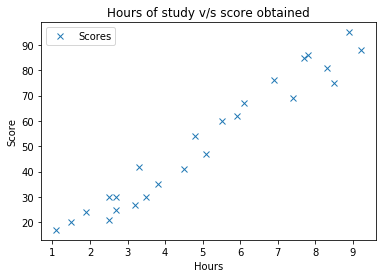

In [9]:
## plot the graph

df.plot(x = 'Hours', y = 'Scores', style = 'x')
plt.title('Hours of study v/s score obtained')
plt.xlabel('Hours')
plt.ylabel('Score')
plt.show()


## Splitting of data

In [10]:
X = df.iloc[:,:-1].values
y = df.iloc[:,1].values

In [11]:
print(X)
print(y)

[[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]
 [1.5]
 [9.2]
 [5.5]
 [8.3]
 [2.7]
 [7.7]
 [5.9]
 [4.5]
 [3.3]
 [1.1]
 [8.9]
 [2.5]
 [1.9]
 [6.1]
 [7.4]
 [2.7]
 [4.8]
 [3.8]
 [6.9]
 [7.8]]
[21 47 27 75 30 20 88 60 81 25 85 62 41 42 17 95 30 24 67 69 30 54 35 76
 86]


In [12]:
#Importing train_test_split function from sklearn package
from sklearn.model_selection import train_test_split  

#Splitting dataset into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0) 
print(X_train)
print(X_test)
print(y_train)
print(y_test)

[[3.8]
 [1.9]
 [7.8]
 [6.9]
 [1.1]
 [5.1]
 [7.7]
 [3.3]
 [8.3]
 [9.2]
 [6.1]
 [3.5]
 [2.7]
 [5.5]
 [2.7]
 [8.5]
 [2.5]
 [4.8]
 [8.9]
 [4.5]]
[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]
[35 24 86 76 17 47 85 42 81 88 67 30 25 60 30 75 21 54 95 41]
[20 27 69 30 62]


## Train the model

In [13]:
from sklearn.linear_model import LinearRegression  

#Building linear regression function
regr = LinearRegression()

#Training the linear regression model
regr.fit(X_train,y_train)
print("Training model is completed")

Training model is completed


## Make Predictions

In [14]:
#Making predictions for testing data
print(X_test) 
y_pred = regr.predict(X_test)
print(y_pred)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]
[16.88414476 33.73226078 75.357018   26.79480124 60.49103328]


## Compare actual and prediction values

In [15]:
comp = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
comp

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


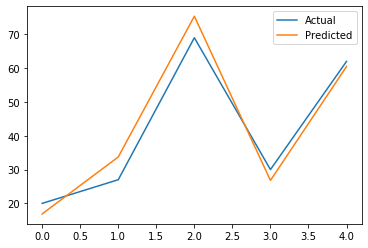

In [16]:
# simple line graph
comp.plot();

## Train v/s Test data

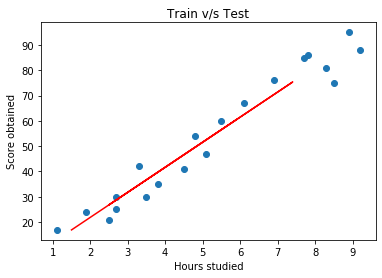

In [17]:
plt.scatter(x = X_train, y = y_train)
plt.plot(X_test, y_pred, color = 'red')
plt.title('Train v/s Test')
plt.xlabel('Hours studied')
plt.ylabel('Score obtained')
plt.show()

## Model Evaluation

In [18]:
#Model evaluation using metrics function
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred)) 
print('Mean Squared Error:',metrics.mean_squared_error(y_test,y_pred))
print('R-Squared Score:', metrics.r2_score(y_test,y_pred))

print("Training accuracy: {} %".format(regr.score(X_train,y_train)*100))
print("Testing accuracy : {} %".format(regr.score(X_test,y_test)*100))

Mean Absolute Error: 4.183859899002975
Mean Squared Error: 21.598769307217406
R-Squared Score: 0.9454906892105355
Training accuracy: 95.15510725211553 %
Testing accuracy : 94.54906892105355 %


### Question1 : What will be predicted score if a student study for 9.25 hrs in a day?

In [19]:
hours = 9.25
new_pred = regr.predict([[hours]])
print("No of Hours studied = {}".format(hours))
print("Predicted Score = {}".format(int(round(new_pred[0]))))

No of Hours studied = 9.25
Predicted Score = 94


### Question2 : What will be predicted score if a student study for 5 hrs in a day?

In [20]:
hours = 5.0
new_pred = regr.predict([[hours]])
print("No of Hours studied = {}".format(hours))
print("Predicted Score = {}".format(int(round(new_pred[0]))))

No of Hours studied = 5.0
Predicted Score = 52


In [21]:
# save the model
import pickle
filename = 'student_score.h5'
pickle.dump(regr,open(filename, 'wb'))



In [22]:
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))

In [23]:
hour = 10

print('Prediction : ', int(round(loaded_model.predict([[hour]])[0])))

Prediction :  101
